<a href="https://colab.research.google.com/github/alfidibesta/PCVK_Genap_2021/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Tugas Nomor 2
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

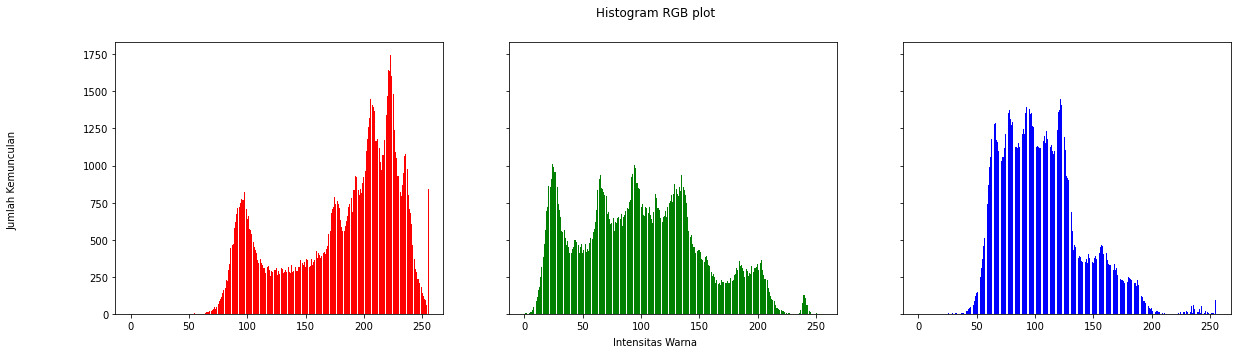

In [24]:
#Tugas Nomor 3
img = cv.imread('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/lc.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

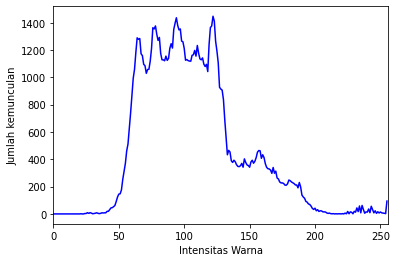

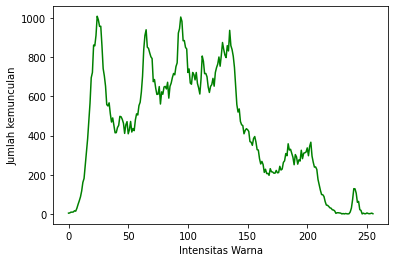

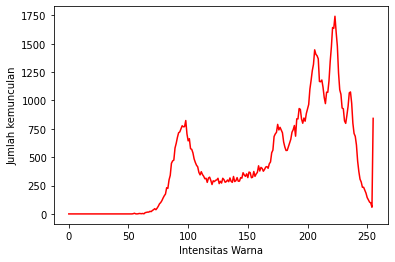

In [25]:
#Tugas Nomor 4
# Membuat Histogram Image
colors = ("b","g","r")
channel_ids = (0, 1, 2)

# Membuat Histogram Plot
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      img[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

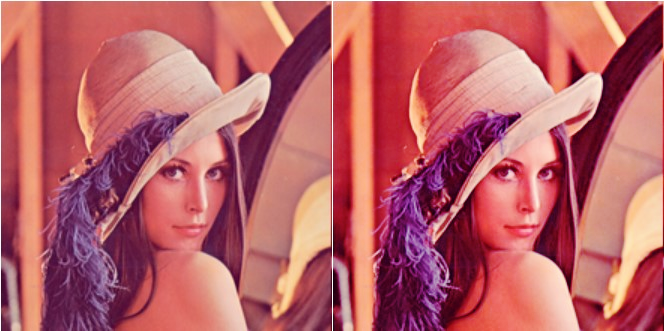

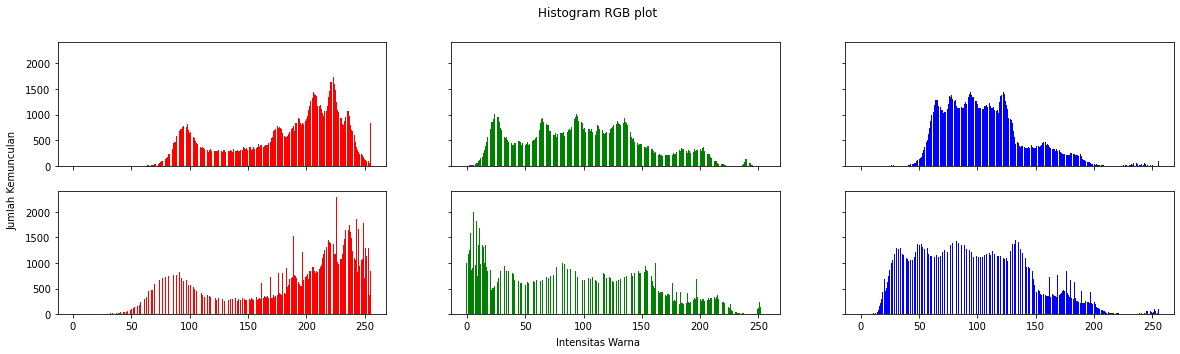

In [26]:
# Tugas Nomor 5
# Histogram Equalization Manual 
img = cv.imread('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/lc.jpg')
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

histo_asli = histog(img)

# Convert to Numpy array 
img_array = np.asarray(img)

# STEP 1: Normalized Cumulative Histogram
# Flatten Image Array and calculate Gistogram via Binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

# Normalized Cumulative Histogram 
chistogram_array = np.cumsum(histogram_array)

# STEP 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

# STEP 3: Transformation
# Flatten image array into 10 list 
img_list = list(img_array.flatten())

# Transform Pixel Values to Qqualize 
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

# Concatenate Image
final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

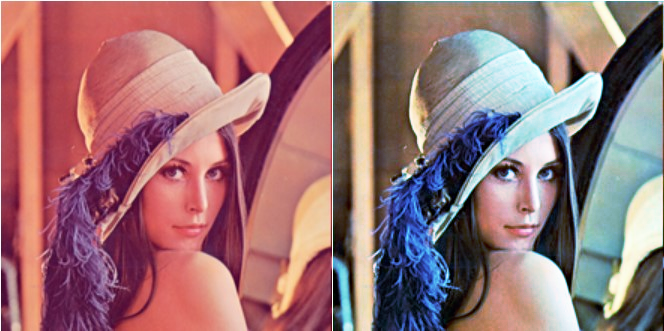

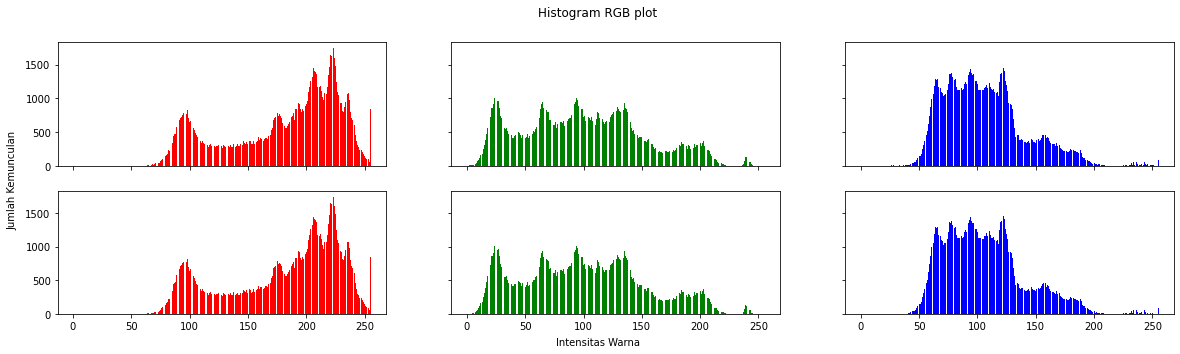

In [27]:
# Tugas Nomor 6
# Histogram equalization using library
img = cv.imread('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/lc.jpg')
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

In [28]:
# Tugas Nomor 7

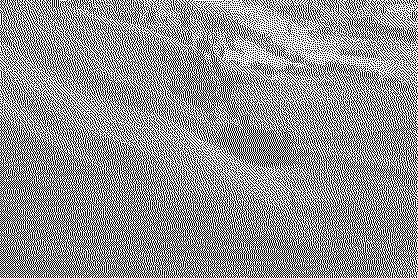

In [29]:
# Tugas Nomor 8
from PIL import Image
import cv2
import numpy as np

imageConvert = Image.open('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/wiki.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/wiki.jpg')


Image = cv2.imread('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/wiki.jpg')

GrayImage = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/wiki.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x<Width-1):
            NewNumber = GrayImage[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y<Height-1):
            NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y<Height-1):
            NewNumber= GrayImage[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1):
            NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv2.imwrite('/content/drive/MyDrive/Kuliah/Mata Kuliah/PCVK/image/wiki.jpg', GrayImage)
cv2_imshow(GrayImage)